### Imports

In [1]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.
C:\Users\shrfm\.conda\envs\capstone-project\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shrfm\.conda\envs\capstone-project\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shrfm\.conda\envs\capstone-project\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shrfm\.conda\e

### Loading Data:

In [2]:
#Extracting Data:
data = pd.read_csv("fer2013.csv")

emotion = np.array(data['emotion'])
pixels = np.array(data['pixels'])
usage = np.array(data['Usage'])

#Changing string to integer for the pixels
for i in range(0, len(pixels)):
    numbers = [int(x) for x in pixels[i].split(' ')]
    pixels[i] = numbers

#Scaling pixels from 0->255 to 0->1
for i in range(0,len(pixels)):
    for j in range(0, len(pixels[i])):
        pixels[i][j] = pixels[i][j]/255

#Splitting Data
x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test = []

for i in range(0, len(usage)):
    if (usage[i] == "Training"):
        x_train.append(pixels[i])
        y_train.append(emotion[i])
    elif (usage[i] == "PublicTest"):
        x_valid.append(pixels[i])
        y_valid.append(emotion[i])
    elif (usage[i] == "PrivateTest"):
        x_test.append(pixels[i])
        y_test.append(emotion[i])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
x_test = np.array(x_test)
y_test = np.array(y_test)

#Unfalttened pictures
x_train_square = []
x_valid_square = []
x_test_square = []

for i in range(len(x_train)):
    x_train_square.append(x_train[i].reshape(48,48))

for i in range(len(x_valid)):
    x_valid_square.append(x_valid[i].reshape(48,48))
    x_test_square.append(x_test[i].reshape(48,48))

### Visualize Images from the dataset

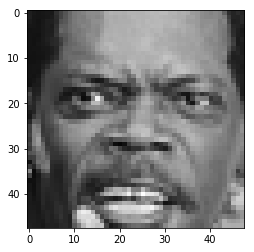

In [3]:
index = 10 #insert any index you want to visualize
#in the following line: (x_train_square) can be changed to (x_valid_square) or (x_test_square)
arr = np.asarray(x_train_square[index])
plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
plt.show()

### Extracting Information from Data

In [4]:
print("Total Number of Pictures = ", len(pixels))
print("Total Number of Pictures for Training = ", len(x_train))
print("Total Number of Pictures for Validation = ", len(x_valid))
print("Total Number of Pictures for Testing = ", len(x_test))

Total Number of Pictures =  35887
Total Number of Pictures for Training =  28709
Total Number of Pictures for Validation =  3589
Total Number of Pictures for Testing =  3589


### Statistics for each Set

In [5]:
def counting(find, array):
    #Counts the number of occurrences of (find) in (array)
    count = 0
    
    for i in array:
        if i==find:
            count=count+1
    
    return count

In [6]:
print("Total Number of each emotion in the Set: ")
#replace (emotion) in the following lines with (y_train)/(y_valid)/(y_test)
#for training/validation/testing sets respectively
print("Anger: ", counting(0,emotion))
print("Disgust: ", counting(1,emotion))
print("Fear: ", counting(2,emotion))
print("Happiness: ", counting(3,emotion))
print("Sadness: ", counting(4,emotion))
print("Surprise: ", counting(5,emotion))
print("Neutral: ", counting(6,emotion))

Total Number of each emotion in the Set: 
Anger:  4953
Disgust:  547
Fear:  5121
Happiness:  8989
Sadness:  6077
Surprise:  4002
Neutral:  6198


### To test accuracies of saved best models

In [7]:
def indexing(find,array):
#Returns an array of indexes for (find) in (array)
    indexes=[]
    
    for i in range(len(array)):
        if array[i]==find:
            indexes.append(i)
    
    return indexes

def filtering(indexes, array):
#returns a new array with only the indexes in (indexes)
    new_array=[]
    
    for i in indexes:
        new_array.append(array[i])
        
    return new_array

#### MLP

In [8]:
#one-hot encoding the labels
y_train_encoded = np_utils.to_categorical(y_train, 7)
y_valid_encoded = np_utils.to_categorical(y_valid, 7)
y_test_encoded = np_utils.to_categorical(y_test, 7)

#Setting up architecture
model = Sequential()
model.add(Dense(192, activation='relu',input_shape=x_train.shape[1:]))
model.add(Dropout(0.05))
model.add(Dense(96, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(7, activation='softmax'))

#Loading weights of saved model and compiling
model.load_weights("MLP.weights.best.hdf5")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0831 01:34:58.201165  1952 deprecation_wrapper.py:119] From C:\Users\shrfm\.conda\envs\capstone-project\lib\site-packages\keras\backend\tensorflow_backend.py:47: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 01:34:58.225323  1952 deprecation_wrapper.py:119] From C:\Users\shrfm\.conda\envs\capstone-project\lib\site-packages\keras\backend\tensorflow_backend.py:349: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 01:34:58.229872  1952 deprecation_wrapper.py:119] From C:\Users\shrfm\.conda\envs\capstone-project\lib\site-packages\keras\backend\tensorflow_backend.py:3145: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 01:34:58.262733  1952 deprecation.py:506] From C:\Users\shrfm\.conda\envs\capstone-project\lib\site-packages\keras\backend\tensorflow_backend.py:2681: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and wil

In [9]:
#(x_test) and (y_test_encoded) can be changed to any of the other sets
#(x_train, y_train_encoded)/(x_valid, y_valid_encoded)
set_score = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Set Accuracy = ", 100*set_score[1])

Set Accuracy =  40.3176372256841


In [10]:
#To test accuracy for specific emotion
#Anger: 0; Disgust: 1; Fear: 2; Happiness: 3; Sadness: 4; Surprise: 5; Neutral:6

emotion=0
indexes=indexing(emotion,y_train)
x_emotion=np.array(filtering(indexes, x_train))
y_emotion=np.array(filtering(indexes, y_train_encoded))

emotion_score = model.evaluate(x_emotion, y_emotion, verbose=0)
print("Emotion Accuracy = ", 100*emotion_score[1])

Emotion Accuracy =  23.45431790408563


#### CNN

In [11]:
#Adjusting Input array sizes for convolutional network
x_train_square_input = np.array(x_train_square).reshape([-1,48,48,1])
x_valid_square_input = np.array(x_valid_square).reshape([-1,48,48,1])
x_test_square_input = np.array(x_test_square).reshape([-1,48,48,1])

#Setting up Architecture
modelcnn = Sequential()
modelcnn.add(Conv2D(32, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(48,48,1)))
modelcnn.add(Conv2D(32, kernel_size=2, strides=1, padding='same', activation='relu'))
modelcnn.add(MaxPooling2D(pool_size=2))

modelcnn.add(Conv2D(64, kernel_size=2, strides=1, padding='same', activation='relu'))
modelcnn.add(Conv2D(64, kernel_size=2, strides=1, padding='same', activation='relu'))
modelcnn.add(MaxPooling2D(pool_size=2))

modelcnn.add(Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu'))
modelcnn.add(Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu'))
modelcnn.add(MaxPooling2D(pool_size=2))

modelcnn.add(Conv2D(286, kernel_size=2, strides=1, padding='same', activation='relu'))
modelcnn.add(Conv2D(286, kernel_size=2, strides=1, padding='same', activation='relu'))
modelcnn.add(GlobalAveragePooling2D())

modelcnn.add(Dense(512, activation='relu'))
modelcnn.add(Dropout(0.1))
modelcnn.add(Dense(286, activation='relu'))
modelcnn.add(Dropout(0.1))
modelcnn.add(Dense(7, activation='softmax'))

#Loading the best saved model and compiling
modelcnn.load_weights("CNN.weights.best.hdf5")
modelcnn.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0831 01:35:02.490355  1952 deprecation_wrapper.py:119] From C:\Users\shrfm\.conda\envs\capstone-project\lib\site-packages\keras\backend\tensorflow_backend.py:3012: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#(x_test) and (y_test_encoded) can be changed to any of the other sets
#(x_train, y_train_encoded)/(x_valid, y_valid_encoded)
set_score = modelcnn.evaluate(x_test_square_input, y_test_encoded, verbose=0)
print("Set Accuracy = ", 100*set_score[1])

Set Accuracy =  64.19615492112592


In [20]:
#To test accuracy for specific emotion
#Anger: 0; Disgust: 1; Fear: 2; Happiness: 3; Sadness: 4; Surprise: 5; Neutral:6

emotion=0
indexes=indexing(emotion,y_train)
x_emotion=np.array(filtering(indexes, x_train_square_input))
y_emotion=np.array(filtering(indexes, y_train_encoded))

emotion_score = modelcnn.evaluate(x_emotion, y_emotion, verbose=0)
print("Emotion Accuracy = ", 100*emotion_score[1])

Emotion Accuracy =  64.33041302522223
